Raha BadriAzarin -- 40052111001


Autoencoder -- Question 5

In [1]:
from keras.datasets import mnist
from keras.layers import Dense , Input
from keras.models import Model 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
#Load Data
(x_train , y_train) , (x_test , y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normlize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(len(x_train) , np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test) , np.prod(x_test.shape[1:]))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
#Q 5-1
#adding noise
factor = 0.42
X_train_noisy = x_train + factor * np.random.normal(loc = 0.0,scale = 1.0,size = x_train.shape)
X_train_noisy= np.clip(X_train_noisy,0.,1.)
X_test_noisy = x_test + factor * np.random.normal(loc = 0.0,scale = 1.0,size = x_test.shape)
X_test_noisy= np.clip(X_test_noisy,0.,1.)


In [5]:
#ِDefine simple model with 3 dense layer

#input layer
input_img = Input(shape=(784,))
#encoding architecture
encode_layer1=Dense(units=128 , activation='relu')(input_img)
#latent view
latent_view=Dense(units=32 , activation='relu')(encode_layer1)
#decoding architecture
decode_layer1=Dense(units=128 , activation='relu')(latent_view)
#output layer
output_img=Dense(units=784 , activation='sigmoid')(decode_layer1)
#define model
model= Model(input_img , output_img)
model.summary()

model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'] )


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
165/165 [==============================] - 5s 21ms/step - loss: 0.2610 - accuracy: 0.0092 - val_loss: 0.1691 - val_accuracy: 0.0091
Epoch 2/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1510 - accuracy: 0.0083 - val_loss: 0.1386 - val_accuracy: 0.0091
Epoch 3/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1276 - accuracy: 0.0080 - val_loss: 0.1232 - val_accuracy: 0.0077
Epoch 4/50
165/165 [==============================] - 3s 18ms/step - loss: 0.1168 - accuracy: 0.0092 - val_loss: 0.1169 - val_accuracy: 0.0086
Epoch 5/50
165/165 [==============================] - 3s 18ms/step - loss: 0.1103 - accuracy: 0.0099 - val_loss: 0.1094 - val_accuracy: 0.0098
Epoch 6/50
165/165 [==============================] - 3s 18ms/step - loss: 0.1058 - accuracy: 0.0108 - val_loss: 0.1067 - val_accuracy: 0.0122
Epoch 7/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1028 - accuracy: 0.0113 - val_loss: 0.1034 - val_accuracy: 0.0114

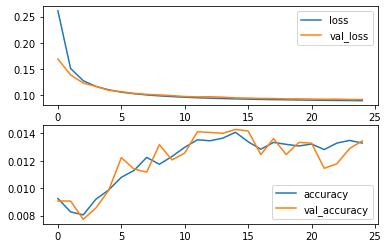

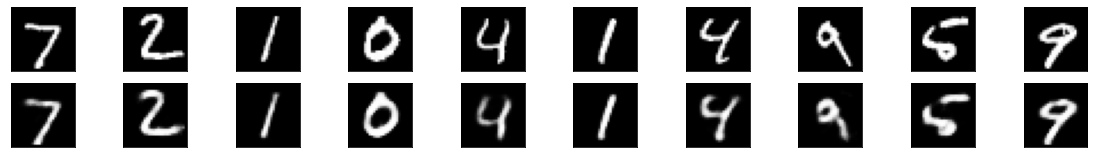

In [7]:
#Q 5-2

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history_org=model.fit(x_train , x_train, epochs=50, batch_size=256, validation_split=0.3, shuffle=True, callbacks=[callback])

predicted_org=model.predict(x_test)

plt.subplot(2,1,1)
plt.plot( history_org.history['loss'], label = 'loss')
plt.plot( history_org.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history_org.history['accuracy'], label = 'accuracy')
plt.plot( history_org.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()


plt.figure(figsize=(40,4))
for i in range (10) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 20 + i+1)
  plt.imshow(predicted_org[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Epoch 1/50
165/165 [==============================] - 5s 22ms/step - loss: 0.5351 - accuracy: 3.3333e-04 - val_loss: 0.5093 - val_accuracy: 5.5556e-05
Epoch 2/50
165/165 [==============================] - 3s 20ms/step - loss: 0.5016 - accuracy: 9.5238e-05 - val_loss: 0.4965 - val_accuracy: 1.1111e-04
Epoch 3/50
165/165 [==============================] - 5s 28ms/step - loss: 0.4931 - accuracy: 4.7619e-05 - val_loss: 0.4914 - val_accuracy: 5.5556e-05
Epoch 4/50
165/165 [==============================] - 4s 23ms/step - loss: 0.4894 - accuracy: 1.1905e-04 - val_loss: 0.4894 - val_accuracy: 1.1111e-04
Epoch 5/50
165/165 [==============================] - 3s 20ms/step - loss: 0.4875 - accuracy: 1.1905e-04 - val_loss: 0.4882 - val_accuracy: 1.1111e-04
Epoch 6/50
165/165 [==============================] - 4s 25ms/step - loss: 0.4863 - accuracy: 1.4286e-04 - val_loss: 0.4867 - val_accuracy: 1.6667e-04
Epoch 7/50
165/165 [==============================] - 4s 24ms/step - loss: 0.4851 - accuracy: 

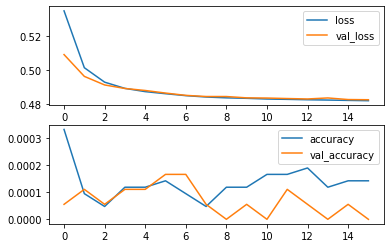

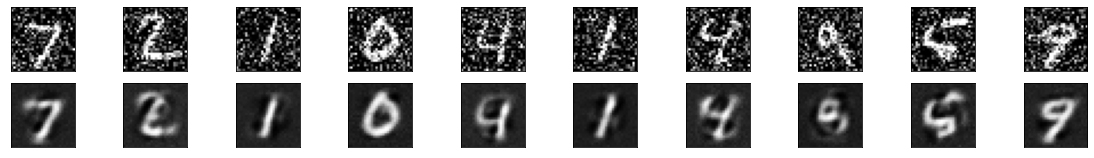

In [6]:
#Q 5-3

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history_noisy=model.fit(X_train_noisy , X_train_noisy, epochs=50, batch_size=256, validation_split=0.3, shuffle=True, callbacks=[callback])

predicted_noisy=model.predict(X_test_noisy)

plt.subplot(2,1,1)
plt.plot( history_noisy.history['loss'], label = 'loss')
plt.plot( history_noisy.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history_noisy.history['accuracy'], label = 'accuracy')
plt.plot( history_noisy.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(40,4))
for i in range (10) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 20 + i+1)
  plt.imshow(predicted_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Epoch 1/100
235/235 [==============================] - 18s 76ms/step - loss: 0.2190 - accuracy: 0.0115 - val_loss: 0.1539 - val_accuracy: 0.0126
Epoch 2/100
235/235 [==============================] - 22s 94ms/step - loss: 0.1411 - accuracy: 0.0121 - val_loss: 0.1312 - val_accuracy: 0.0130
Epoch 3/100
235/235 [==============================] - 19s 82ms/step - loss: 0.1253 - accuracy: 0.0116 - val_loss: 0.1200 - val_accuracy: 0.0142
Epoch 4/100
235/235 [==============================] - 20s 84ms/step - loss: 0.1174 - accuracy: 0.0126 - val_loss: 0.1175 - val_accuracy: 0.0109
Epoch 5/100
235/235 [==============================] - 17s 73ms/step - loss: 0.1124 - accuracy: 0.0137 - val_loss: 0.1116 - val_accuracy: 0.0140
Epoch 6/100
235/235 [==============================] - 17s 74ms/step - loss: 0.1088 - accuracy: 0.0139 - val_loss: 0.1092 - val_accuracy: 0.0136
Epoch 7/100
235/235 [==============================] - 17s 73ms/step - loss: 0.1061 - accuracy: 0.0142 - val_loss: 0.1079 - val_ac

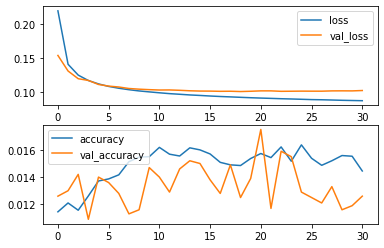

In [7]:
# Q 5-4
#define autoencoder for denosing 

#input layer
input_img = Input(shape=(784,))
#encoding architecture
encode_layer1=Dense(units=800 , activation='relu')(input_img)
encode_layer2=Dense(units=400, activation='relu')(encode_layer1)
#latent view
latent_view=Dense(units=50 , activation='relu')(encode_layer2)
#decoding architecture
decode_layer1=Dense(units=400 , activation='relu')(latent_view)
decode_layer2=Dense(units=800 , activation='relu')(decode_layer1)
#output layer
output_img=Dense(units=784 , activation='sigmoid')(decode_layer2)

autoencoder = Model(input_img , output_img)

autoencoder.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'] )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history=autoencoder.fit(X_train_noisy , x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy , x_test) ,
                callbacks=[callback])
####
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()


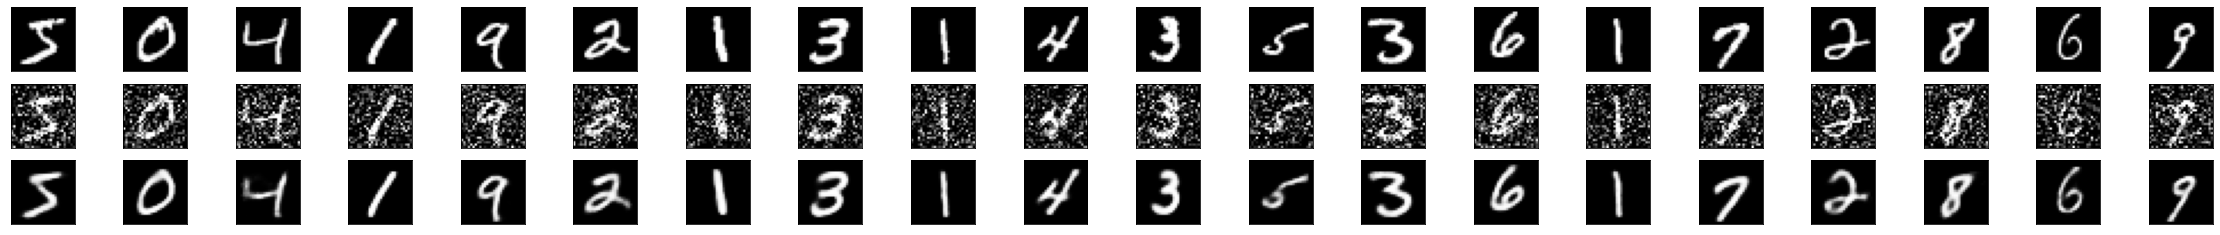

In [8]:
#Q 5-6
predicted_train=autoencoder.predict(X_train_noisy)


plt.figure(figsize=(40,4))
for i in range (20) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20,i+1 +20)
  plt.imshow(X_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 2*20 + i+1)
  plt.imshow(predicted_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

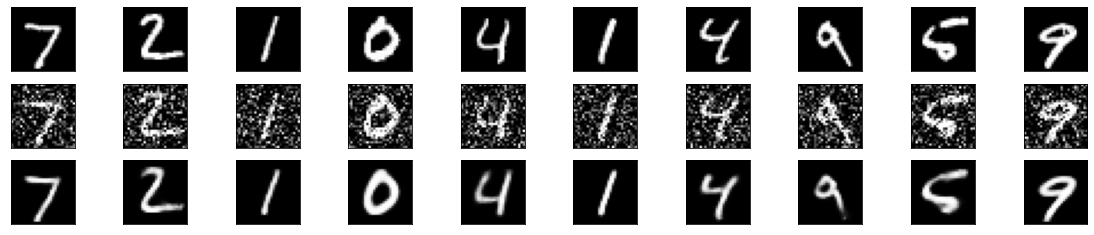

In [9]:
#Q 5-7

predicted_test=autoencoder.predict(X_test_noisy)


plt.figure(figsize=(40,4))
for i in range (10) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20,i+1 +20)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 2*20 + i+1)
  plt.imshow(predicted_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Epoch 1/50
165/165 [==============================] - 5s 25ms/step - loss: 0.2596 - accuracy: 0.0236 - val_loss: 0.1718 - val_accuracy: 0.0423
Epoch 2/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1517 - accuracy: 0.0506 - val_loss: 0.1387 - val_accuracy: 0.0608
Epoch 3/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1304 - accuracy: 0.0693 - val_loss: 0.1264 - val_accuracy: 0.0797
Epoch 4/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1210 - accuracy: 0.0817 - val_loss: 0.1186 - val_accuracy: 0.0882
Epoch 5/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1152 - accuracy: 0.0925 - val_loss: 0.1145 - val_accuracy: 0.0943
Epoch 6/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1116 - accuracy: 0.1024 - val_loss: 0.1116 - val_accuracy: 0.1126
Epoch 7/50
165/165 [==============================] - 3s 19ms/step - loss: 0.1091 - accuracy: 0.1124 - val_loss: 0.1097 - val_accuracy: 0.1154

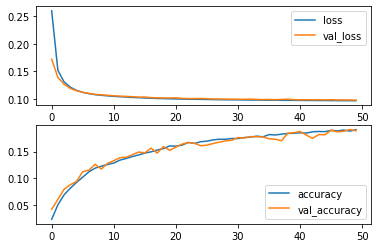

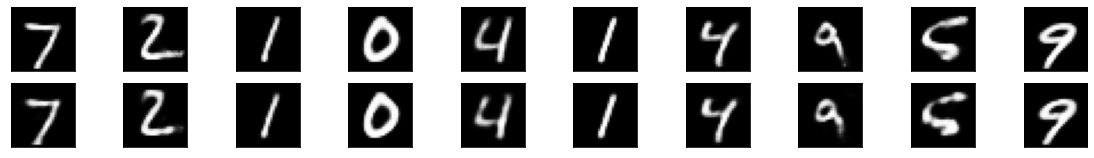

In [10]:
#Q 5-5

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history_denoise=model.fit(predicted_train , predicted_train, epochs=50, batch_size=256, validation_split=0.3, shuffle=True, callbacks=[callback])

predicted_denoise=model.predict(predicted_test)

plt.subplot(2,1,1)
plt.plot( history_denoise.history['loss'], label = 'loss')
plt.plot( history_denoise.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history_denoise.history['accuracy'], label = 'accuracy')
plt.plot( history_denoise.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(40,4))
for i in range (10) :
  ax = plt.subplot(3,20,i+1)
  plt.imshow(predicted_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3,20, 20 + i+1)
  plt.imshow(predicted_denoise[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()